In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [5]:
from ucimlrepo import fetch_ucirepo 
  
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 

In [6]:
df = pd.concat([X, y], axis=1)

In [7]:
taiwan_df = df.copy()
taiwan_df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


In [8]:
print(taiwan_df.shape)

(6819, 96)


In [9]:
print(taiwan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [10]:
taiwan_df.drop(taiwan_df.columns[taiwan_df.nunique() == 1][0],axis=1,inplace=True)
taiwan_df.columns = taiwan_df.columns.str.replace(' ','')

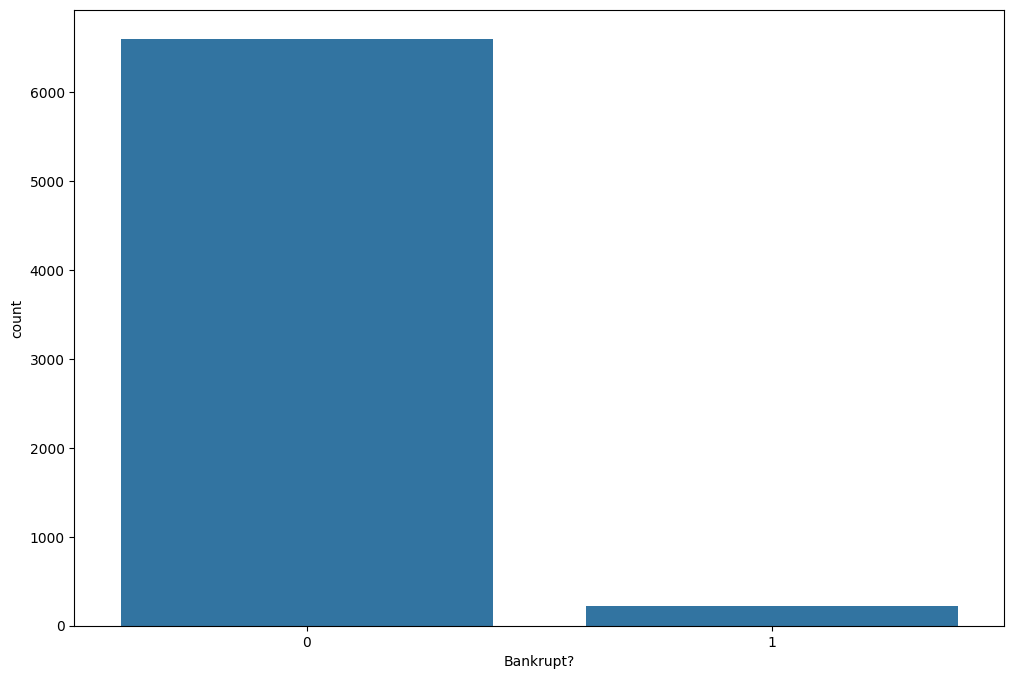

In [11]:
plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(x=taiwan_df['Bankrupt?'])

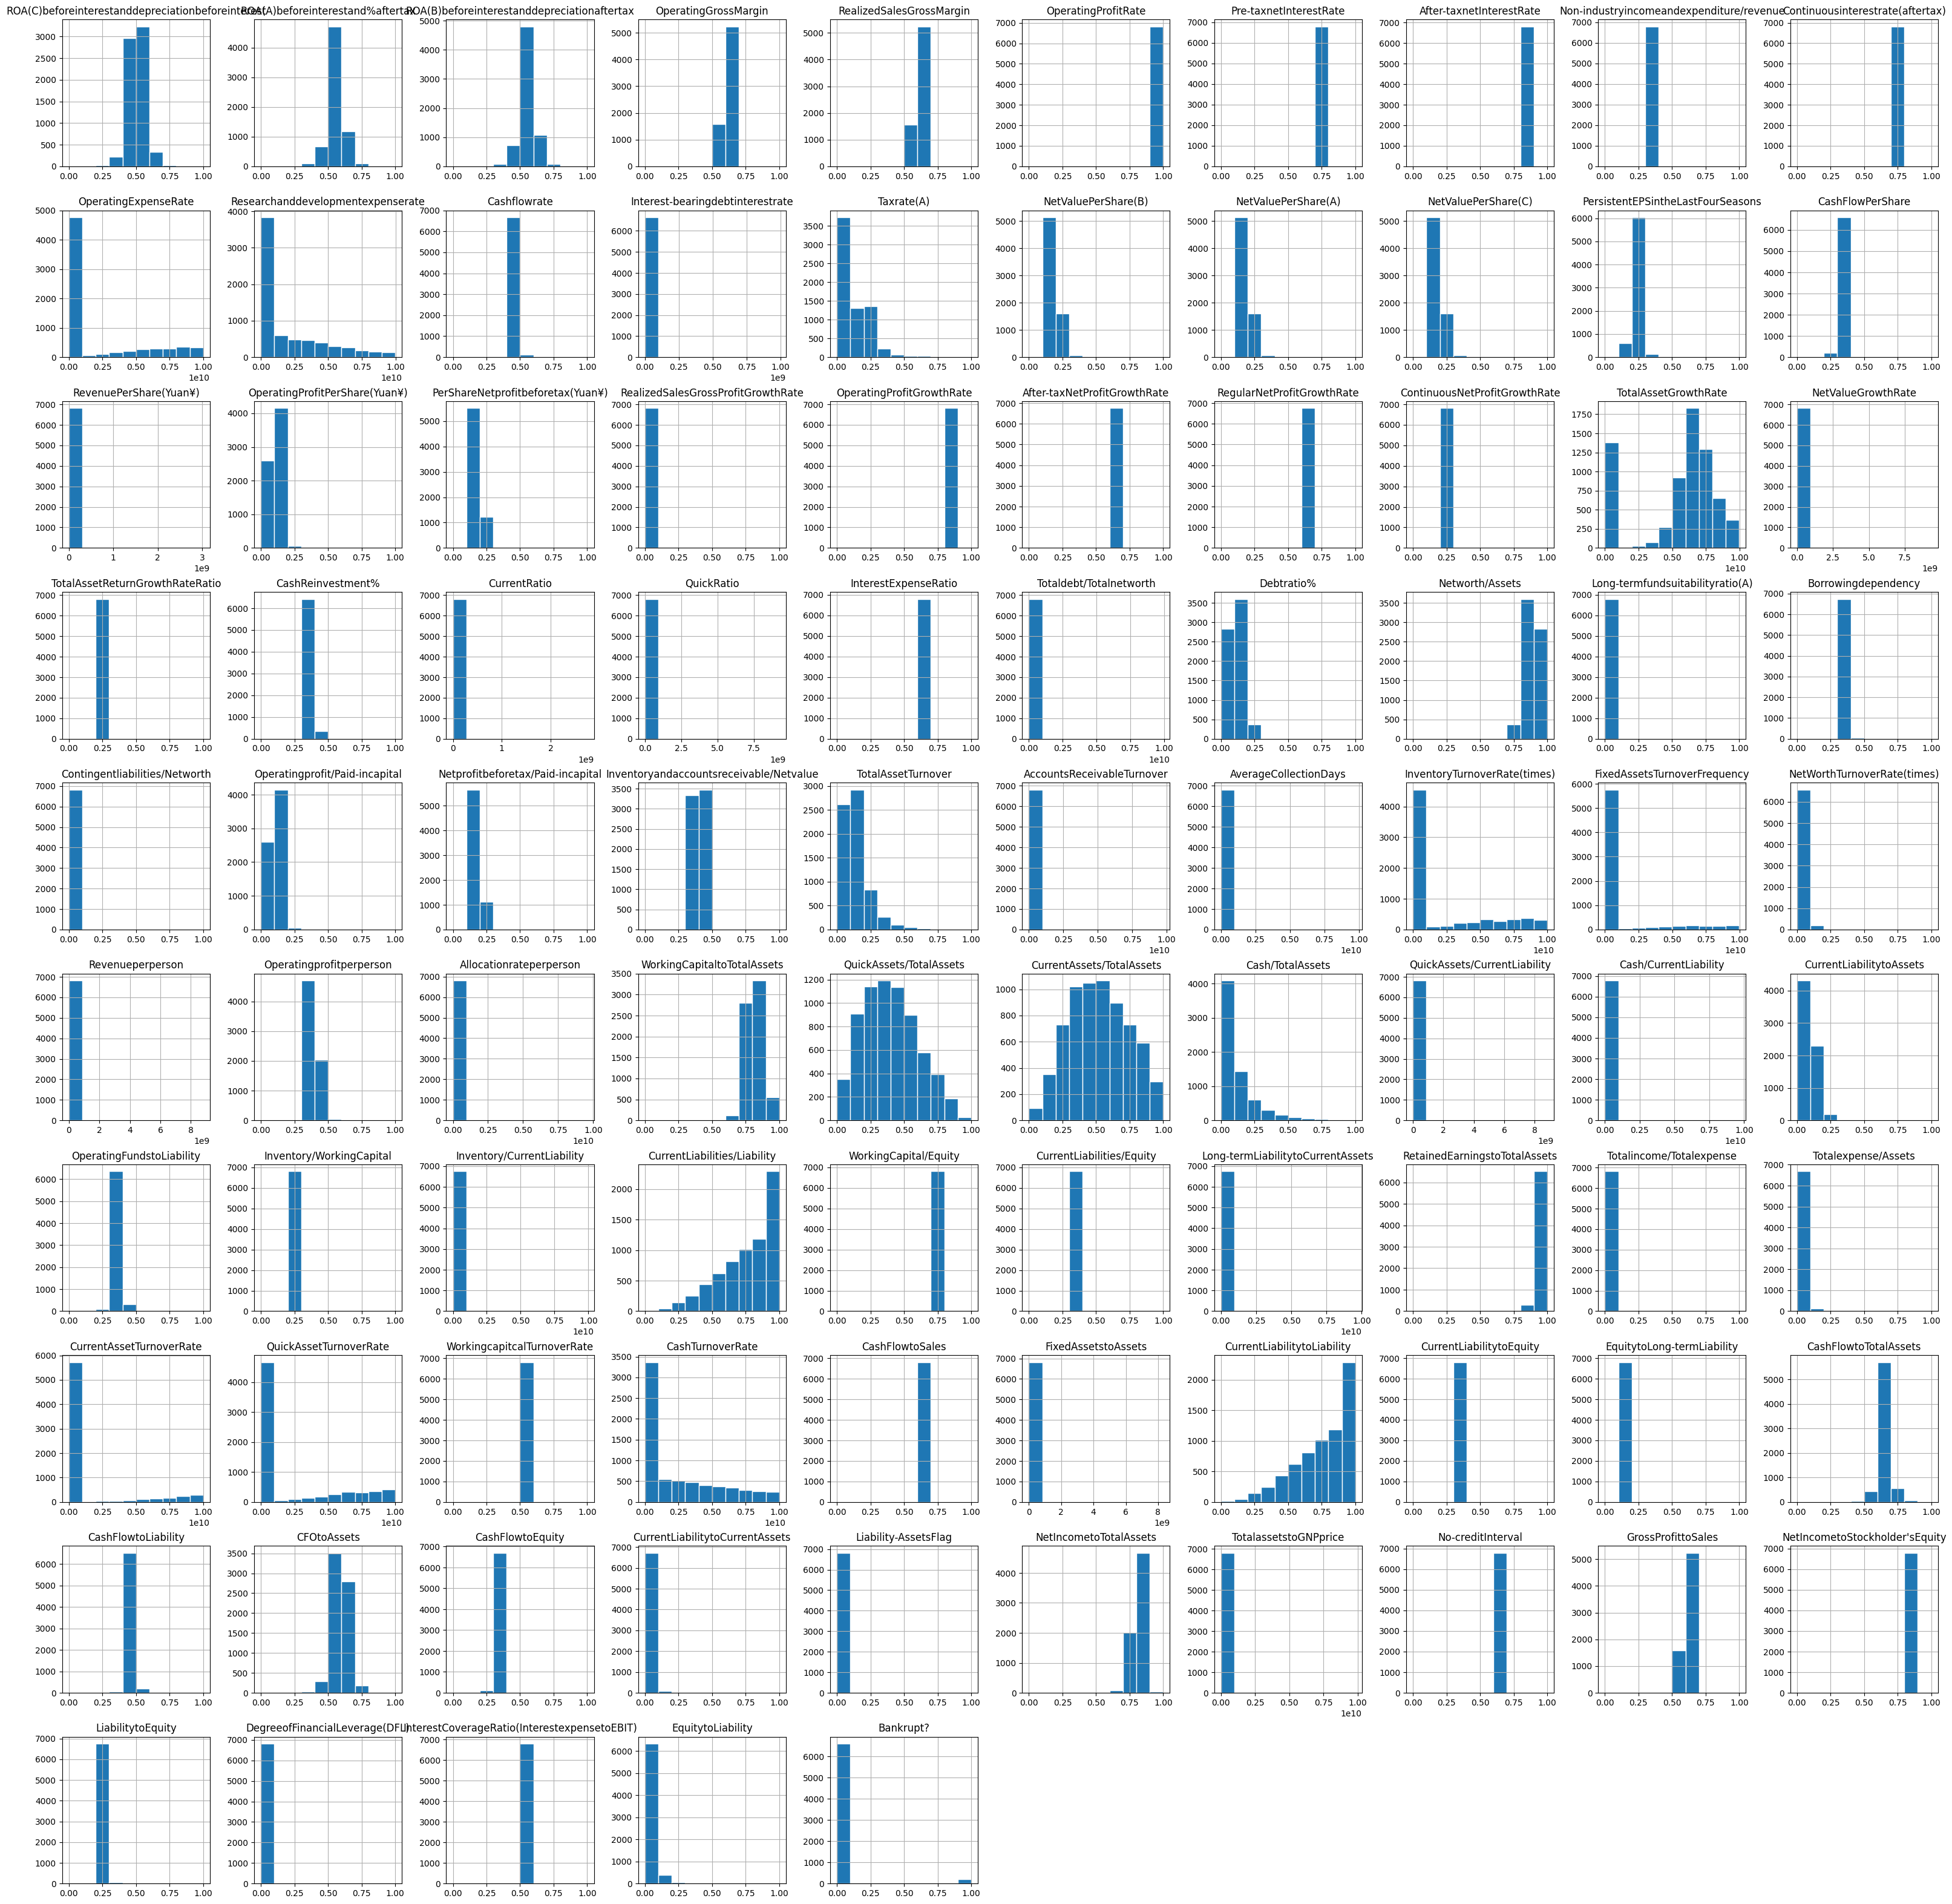

In [12]:
taiwan_df.hist(figsize=(40,40), edgecolor='white')
plt.show()

In [13]:
X = taiwan_df.drop('Bankrupt?',axis=1)
y = taiwan_df['Bankrupt?']

# resampling using SMOTE
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 6599, 0: 6599})


In [14]:
# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=0.95) 
X_train_scaled = pca.fit_transform(X_train_pca)
X_test_scaled = pca.transform(X_test_pca)

In [15]:
# Train decision tree with information gain
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train_scaled, y_train)

# Predict and evaluate
y_train_pred_entropy = clf_entropy.predict(X_train_scaled)
y_test_pred_entropy = clf_entropy.predict(X_test_scaled)

metrics = {
    'Training Error': 1 - accuracy_score(y_train, y_train_pred_entropy),
    'Testing Error': 1 - accuracy_score(y_test, y_test_pred_entropy),
    'Training Accuracy': accuracy_score(y_train, y_train_pred_entropy),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_entropy),
    'Training F1': f1_score(y_train, y_train_pred_entropy),
    'Testing F1': f1_score(y_test, y_test_pred_entropy),
    'Training AUC': roc_auc_score(y_train, y_train_pred_entropy),
    'Testing AUC': roc_auc_score(y_test, y_test_pred_entropy),
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

Training Error: 0.0
Testing Error: 0.04318181818181821
Training Accuracy: 1.0
Testing Accuracy: 0.9568181818181818
Training F1: 1.0
Testing F1: 0.9573033707865168
Training AUC: 1.0
Testing AUC: 0.9568181818181819


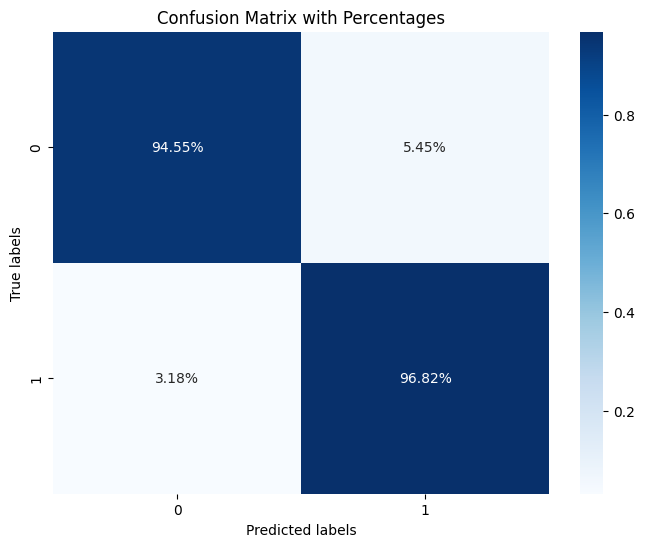

In [16]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_entropy)

# Convert the confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

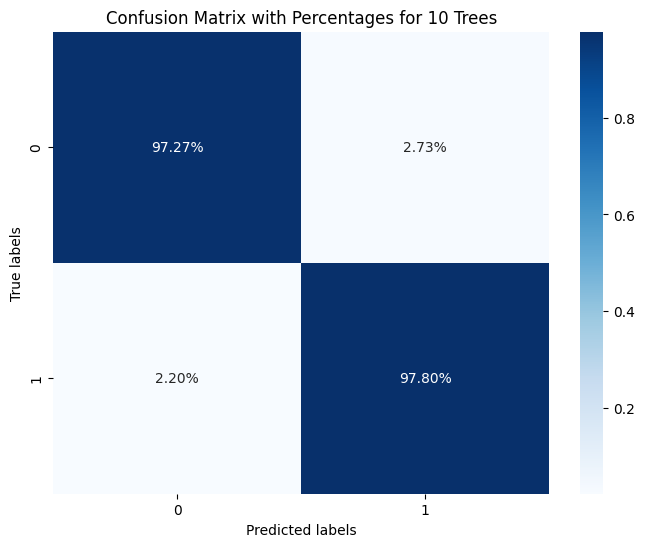

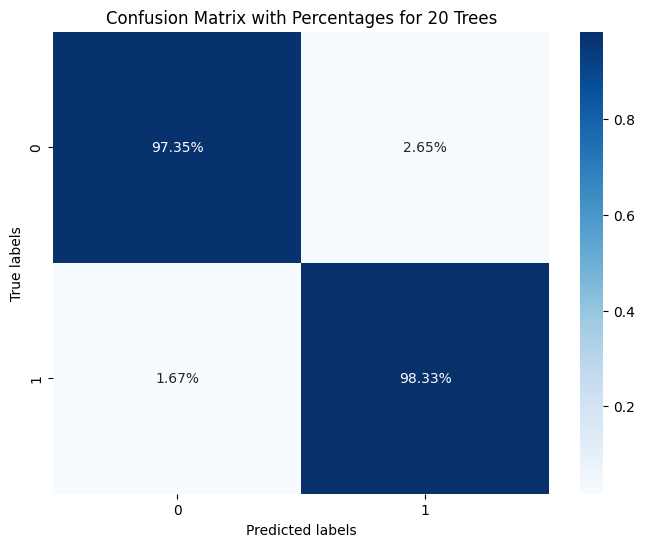

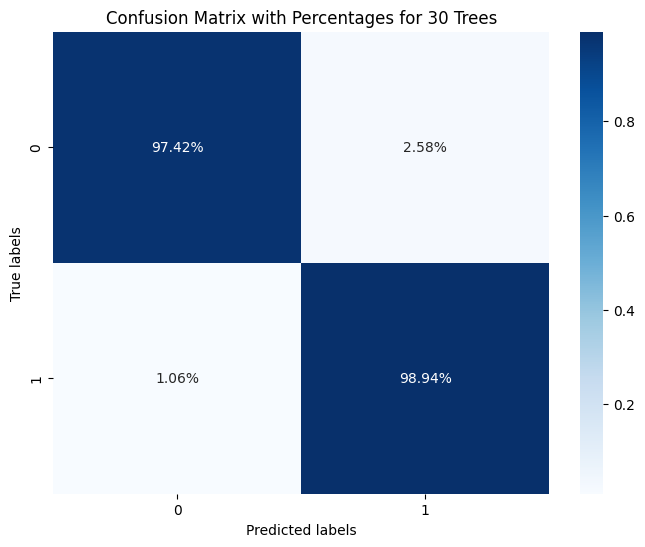

Results for 10 Trees:
Training Error: 0.0008524341731388496
Testing Error: 0.024621212121212155
Training Accuracy: 0.9991475658268612
Testing Accuracy: 0.9753787878787878
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.97      0.98      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

--------------------------------------------------
Results for 20 Trees:
Training Error: 0.0003788596325061677
Testing Error: 0.021590909090909105
Training Accuracy: 0.9996211403674938
Testing Accuracy: 0.9784090909090909
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.97      0.98      0.98      1320

    accuracy                           0.98      2640
   macro avg    

In [17]:
# Number of trees to explore
n_estimators_list = [10, 20, 30]

# Initialize a dictionary to store metrics
results = {n: {} for n in n_estimators_list}

# Loop through each number of trees
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_rf = rf.predict(X_train_scaled)
    y_test_pred_rf = rf.predict(X_test_scaled)
    
    # Metrics
    results[n_estimators]['Training Error'] = 1 - accuracy_score(y_train, y_train_pred_rf)
    results[n_estimators]['Testing Error'] = 1 - accuracy_score(y_test, y_test_pred_rf)
    results[n_estimators]['Training Accuracy'] = accuracy_score(y_train, y_train_pred_rf)
    results[n_estimators]['Testing Accuracy'] = accuracy_score(y_test, y_test_pred_rf)
    results[n_estimators]['Classification Report'] = classification_report(y_test, y_test_pred_rf)
    
    # Calculate the confusion matrix and convert to percentages
    cm = confusion_matrix(y_test, y_test_pred_rf)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap='Blues')
    plt.title(f'Confusion Matrix with Percentages for {n_estimators} Trees')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Print results
for n_estimators, metrics in results.items():
    print(f"Results for {n_estimators} Trees:")
    for metric_name, metric_value in metrics.items(): 
            print(f"{metric_name}: {metric_value}")
    print("-" * 50)

In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_train_pred_entropy_new = model.predict(X_train_scaled)
y_test_pred_entropy_new = model.predict(X_test_scaled)

metrics = {
    'Training Error': 1 - accuracy_score(y_train, y_train_pred_entropy_new),
    'Testing Error': 1 - accuracy_score(y_test, y_test_pred_entropy_new),
    'Training Accuracy': accuracy_score(y_train, y_train_pred_entropy_new),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_entropy_new),
    'Training F1': f1_score(y_train, y_train_pred_entropy_new),
    'Testing F1': f1_score(y_test, y_test_pred_entropy_new),
    'Training AUC': roc_auc_score(y_train, y_train_pred_entropy_new),
    'Testing AUC': roc_auc_score(y_test, y_test_pred_entropy_new),
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

Training Error: 0.0802235271831786
Testing Error: 0.08863636363636362
Training Accuracy: 0.9197764728168214
Testing Accuracy: 0.9113636363636364
Training F1: 0.9213483146067416
Testing F1: 0.912751677852349
Training AUC: 0.9197764728168213
Testing AUC: 0.9113636363636364


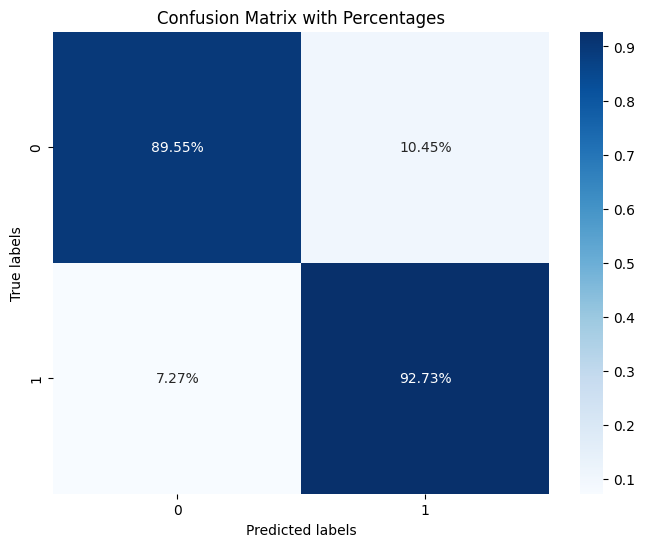

In [19]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_entropy_new)

# Convert the confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap='Blues')
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

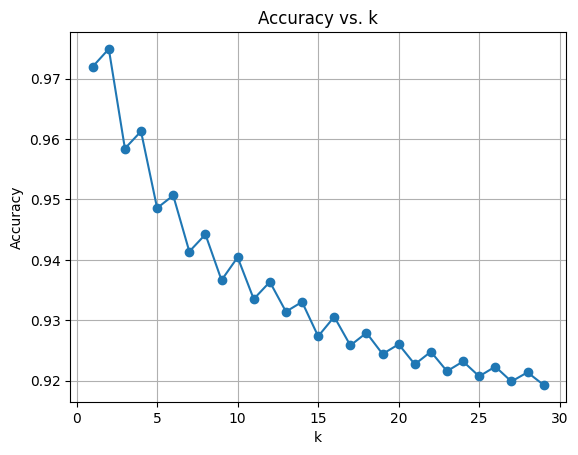

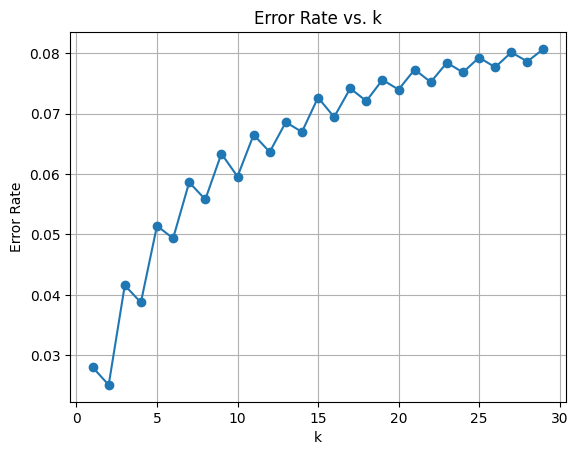

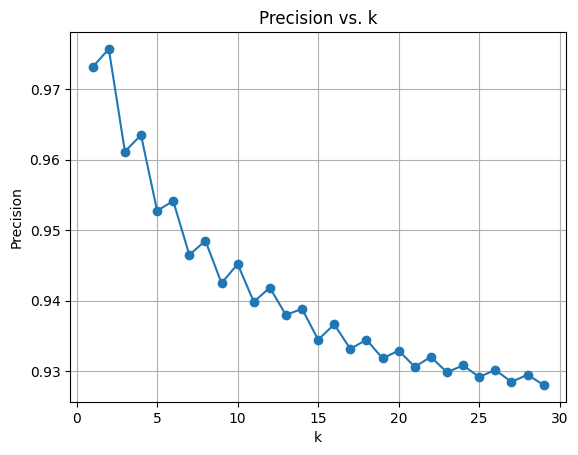

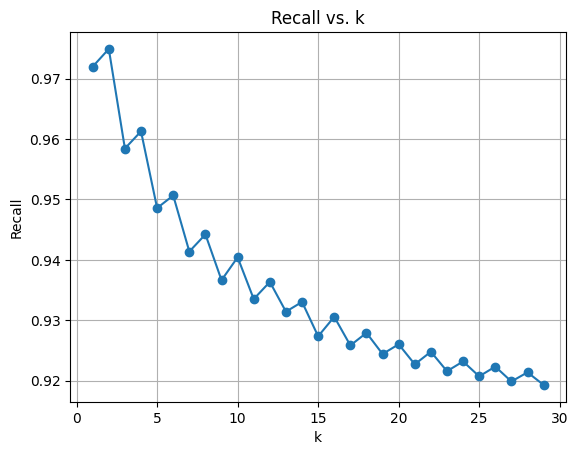

Optimal k: 2


In [20]:
# k-values ranging from 1 to 29
k_values = list(range(1, 30))

accuracy_scores = []
error_rates = []
precision_scores = []
recall_scores = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro'])
    
    accuracy = np.mean(cv_results['test_accuracy'])
    error = 1 - accuracy
    precision = np.mean(cv_results['test_precision_macro'])
    recall = np.mean(cv_results['test_recall_macro'])
    
    accuracy_scores.append(accuracy)
    error_rates.append(error)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot accuracy vs. k
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot error rate vs. k
plt.plot(k_values, error_rates, marker='o')
plt.title('Error Rate vs. k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Plot precision vs. k
plt.plot(k_values, precision_scores, marker='o')
plt.title('Precision vs. k')
plt.xlabel('k')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Plot recall vs. k
plt.plot(k_values, recall_scores, marker='o')
plt.title('Recall vs. k')
plt.xlabel('k')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

optimal_k = k_values[error_rates.index(min(error_rates))]
print("Optimal k:", optimal_k)

In [21]:
# Support vector machine classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm_clf.fit(X_train_scaled, y_train)
y_train_pred_svm = svm_clf.predict(X_train_scaled)
y_test_pred_svm = svm_clf.predict(X_test_scaled)

metrics = {
    'Training Error': 1 - accuracy_score(y_train, y_train_pred_svm),
    'Testing Error': 1 - accuracy_score(y_test, y_test_pred_svm),
    'Training Accuracy': accuracy_score(y_train, y_train_pred_svm),
    'Testing Accuracy': accuracy_score(y_test, y_test_pred_svm),
    'Training F1': f1_score(y_train, y_train_pred_svm),
    'Testing F1': f1_score(y_test, y_test_pred_svm),
    'Training AUC': roc_auc_score(y_train, y_train_pred_svm),
    'Testing AUC': roc_auc_score(y_test, y_test_pred_svm),
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

Training Error: 0.07605607122561087
Testing Error: 0.0840909090909091
Training Accuracy: 0.9239439287743891
Testing Accuracy: 0.9159090909090909
Training F1: 0.925874642296686
Testing F1: 0.9178386380458919
Training AUC: 0.923943928774389
Testing AUC: 0.9159090909090909


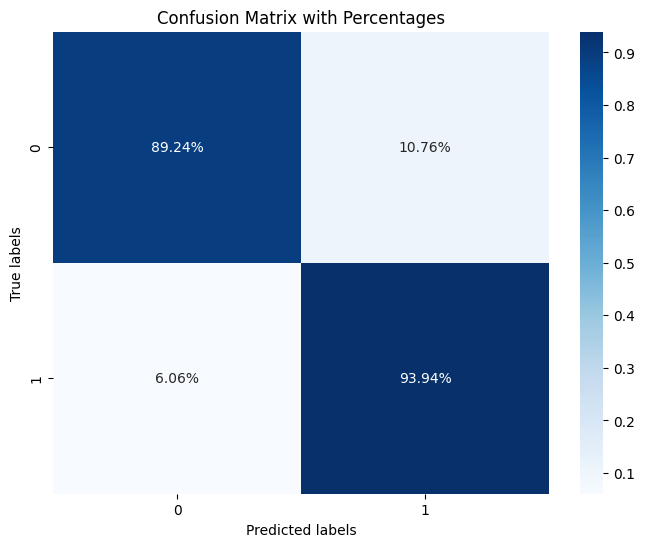

In [22]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)

# Convert the confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap='Blues')
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

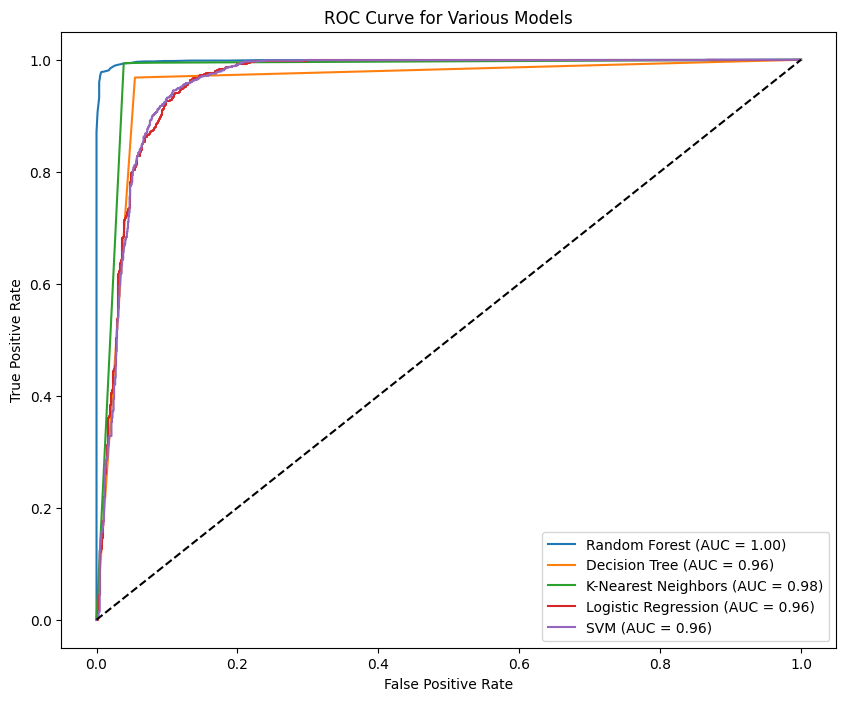

In [23]:
# Dictionary of models
models = {
    "Random Forest": rf,
    "Decision Tree": clf_entropy,
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Logistic Regression": model,
    "SVM": svm_clf  
}

# Function to plot ROC-AUC for each model
def plot_roc_auc(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, linestyle='-', label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Various Models')
    plt.legend(loc='lower right')
    plt.show()

# Uncomment the following line to run the function with example data
plot_roc_auc(models, X_train_scaled, X_test_scaled, y_train, y_test)

In [24]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l1', 'l2'],     
    'solver': ['liblinear']      
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predicting on the test set with the best parameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluating the model
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.92
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1320
           1       0.90      0.93      0.91      1320

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

